# <center> **Tesina di Fondamenti di Data Science 2022-2023**

<br>
<div align="center">
    <img src="img/wallpaper.jpg" width="1300" height="auto">

### <center> _Andrea Spinelli, Raffaele Terracino, Marco Valenti_
##### <center> \<GG/MM/AAAA\>

***
***

# __`Indice`__

###  [`1. - Traccia`](#1-traccia)
### [`2. - Pipeline Analysis`](#2-pipeline-analysis)
##### &emsp;&emsp; [`2.1 - Data collection`](#21-data-collection)
##### &emsp;&emsp; [`2.2 - Data preprocessing`](#22-data-preprocessing)
##### &emsp;&emsp; [`2.3 - Analytical processing`](#23-analytical-processing)
### [`3. - Risultati`](#3-risultati)
##### &emsp;&emsp; [`3.1 - Clustering`](#31-clustering)
##### &emsp;&emsp; [`3.2 - Matrix Confusion`](#32-matrix-confusion)
### [`4. - Extra`](#)
##### &emsp;&emsp; [`4.1 - Subtitle`](#)
##### &emsp;&emsp; [`4.2 - Subtitle`](#)

***
***
# __`1 Traccia`__

Sia dato il dataset `digits.csv` che contiene le immagini di numeri scritti a mano ($8\times 8=64$ pixel), inseriti come righe del file, in cui l’ultima colonna di ogni riga rappresenta il target.

<br>
<div align="center">
    <img src="img/track1.png" width="800" height="auto"><br>
    <a href="https://www.educative.io/answers/what-is-datasetsloaddigits-in-sklearn"> https://www.educative.io/answers/what-is-datasetsloaddigits-in-sklearn </a>
</div>

Realizzare un __Progetto di Data Analysis__ che:
- Prevede l’`utilizzo della PCA` per proiettare le $64$ dimensioni sulle prime due componenti principali, questi punti sono la proiezione di ciascun punto dati lungo le direzioni con la varianza maggiore;
- Prevede la `clusterizzazione dei punti` ($k=10$) tramite tecnica $K$ _- Means_ (basato sul centroide);
- Ripete la `clusterizzazione sulle proiezioni sulle prime N componenti principali`, con $N$ che varia tra $2$ e $6$;
- Per ogni clusterizzazione produce una `matrice di confusione` che metta a confronto l’accuracy nella classificazione al variare del numero di componenti principali scelte.

<br>
<div align="center">
    <img src="img/track2.png" width="800" height="auto">
</div>


***
***
# __`2 Pipeline Analysis`__


### __`2.1 Data collection`__

L'obiettivo del _progetto_ è quello di costruire un modello capace di predire le cifre rappresentate in immagini di $8\times 8$ pixel, dopodiché effettuare le analisi descritta dalla _Traccia_. 
Si evidenzia pertanto che se si volessero fare ulteriori analisi di questo tipo, i dataset di training o di test, dovranno essere rappresentati nel modo che andremo a descrivere.

Il progetto seguirà la __Pipeline Analysis__ studiata durante il corso, in modo tale da avere maggiore chiarezza durante le varie fasi.<br>
Tra le prime fasi della seguente _Pipeline_ v'è innanzitutto la __raccolta dei dati__.

Il _dataset_ di riferimento preso a campione per il progetto viene fornito dalla libreria `sklearn` di Python (presente eventualmente nel file `../dataset/digits.csv`), nel quale, dopo un'accurata analisi, il suo tipo di dati si è identificato come __NON interdipendenti__, nello specifico: __Multidimensionali__.

Il dataset per l'appunto è conservato in un database contenente delle tuple generiche di cifre (da $0$ a $9$), descritte come una sequenza di $8\times 8$ pixel con una certa intensità, e alla fine di ciascun tupla è presente la cifra che sta rappresentando. Più formalmente:

$D=\{X_i Y_i : X_i=(x_1,...,x_{64}), \forall Y_i \in(0,...,9)\}$ 
$\quad\quad \forall x_j \in(0,...,255)$
$\quad\quad \forall i=0,...,n$
$\quad\quad \forall j=0,...,64$

dove <br>
$X_i$ descrive gli $8\times 8$ pixel di una cifra con una tupla di $64$ attributi numerici con "intensità" da $0$ a $255$, <br>
$Y_i$ indica la cifra target che sta rappresentando $X_i$.



>Nel seguente codice si vanno a importare tutte le librerie necessarie allo scopo del progetto e preleviamo il dataset dalla libreria `sklearn`, mediante il metodo `load_digits()`.<br>
Con i metodi `.data` e `.target` preleviamo in corrispondenza tutte le tuple che rappresentano le cifre e le cifre che vengono rappresentate; quest'ultimi vengono assegnati rispettivamente alle variabili `X` e `Y`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

digits = load_digits()
X, Y = digits.data, digits.target

***

### __`2.2 Data preprocessing`__

La fase successiva della nostra Pipeline è la __pre-elaborazione dei dati__, che a sua volta suddividiamo in altre due macro fasi:

- __Estrazione delle features__, affinché il modello comprenda che tipo di elaborazione deve intraprendere, è necessario che il dataset abbia delle proprietà che valorizzano i dati al suo interno. La dimensione del nostro problema si circoscrive ai 64 pixel delle immagini, nonché i campi dei record, che utilizzeremo come nostre __Features__. 

- __Pulizia dei dati__, dato che le considerazioni della fase precedente sono state fatte con il dataset fornito dalla libreria `sklearn`, possiamo assumere che i dati siano puliti; tuttavia, senza voler perdere di generalità, si descrivono comunque le tecniche principali per la pulitura dei dati, per un eventuali analisi, in modo tale che possano essere conformi al modello che si vuole creare:
    - __Data Cleaning__, di cui bisogno tenere in considerazione:<br> 
    La _mancanza di attributi_, la quale, in quanto trattiamo delle immagini, si può risolvere mediante tecniche di Analisi di Immagini, tra cui la media.<br>
    L'_identificazione degli outliers_, il valore dei campi dei record devono essere compresi tra $0$ e $255$, pertanto si possono porre delle condizioni in cui il dato assume il valore del limite più vicino; altrimenti si applica la media.
    L'_eliminazione dei rumore_, il quale, se non è un problema fisico di un sistema, si può trattare tramite binning.
    - __Data Integration__, sappiamo già come i dati devono essere descritti; pertanto, qualsiasi tecnica di _append_ dei dati può essere usata.
    - __Data Transformation__, con lo scopo di voler visualizzare i dati in modo tali da poter fare delle osservazioni, i dati possono essere _normalizzati_ mediante la tecnica _Z-Score Normalization_.
    - __Data Reduction__, in un caso ipotetico di lavorare con un miliardo di record, si tratterebbe di lavorare con un dataset di minimo poco più 7.5Gb, non eccessivamente oneroso per una macchina prestante, visto però che il modello che stiamo andando a costruire non tratterà una grossa mole di dati è possibile fare delle _aggregazioni_.

> La seguente istruzione esegue la Z-Score Normalization per il nostro dataset, riducendo il campo nell'intervallo $(-1,1)$

In [2]:
X = X/1000

***

### __`2.3 Analytical processing`__

L'ultima fase della Pipeline è l'__elaborazione dei dati__. L'obiettivo principale dei nostri dati è la _rappresentanza_, pertanto faremo riferimento all'__apprendimento NON supervisionato__, sfruttando sia la __riduzione dei dati__ che il __clustering__.

Il motivo per cui si fa uso di entrambe le tecniche, di apprendimento NON supervisionato, è perché si vuole visualizzare se il modello sia capace di classificare in modo corretto, o meno, le immagini delle cifre che gli si danno in input.<br>
In questo ci viene d'aiuto il clustering; tuttavia, affinchè anche noi possiamo visualizzare, effettuare dei confronti e fare delle osservazioni, dobbiamo ridurre la dimensionaità dei dati in modo tali da rappresentarli, in questo ci viene d'aiuto la riduzione dei dati.

Prima di tutto sappiamo di avere $64$ dimensioni nel nostro dataset, questi però li dobbiamo diminuire; l'idea è quella di trasformare i record in punti e proiettarli, nel piano cartesiano, lungo le loro direzioni con la varianza maggiore. <br>
Per fare ciò, ricorriamo alla __PCA__ (__Principal Component Analysis__), che rivela le strutture nascoste a livello multidimensionale riducendole ad un numero basso per poterle rappresentare.

> Nel codice a seguire si sceglie innazitutto il numero di componenti principali, dopodiché si fa uso dei metodi (forniti dalla libreria `sklearn.decomposition`), `PCA()`, che prepara il numero delle componenti principali, seguita da `fit_transform()`, che effettua la trasformazione dei dati nelle componenti principali scelte.<br>
Dopodichè a seguire ci sono i metodi per effettuare il plot del risultato.

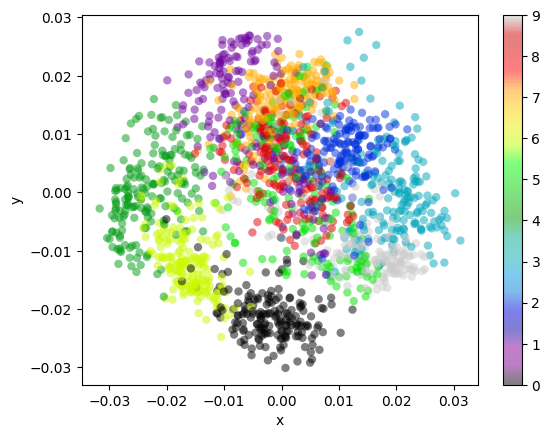

In [3]:
n_comp = 2

X = - PCA(n_comp).fit_transform(X)

plt.scatter(X[:,0], X[:,1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps["nipy_spectral"])

plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

//Some text

K-MEANS

***
***
# __`3 Risultati`__

### __`3.1 Clustering`__

//Some text

***

### __`3.2 Matrix confusion`__

//Some text

***
***
# __`4 Extra`__

### __`4.1 Subtitle`__

//Some text

***

### __`4.2 Subtitle`__

//Some text

//Some text